## Домашнее задание к видеоуроку
#### Задание №1

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
data = boston['data']

In [8]:
feature_names = boston['feature_names']
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
target = boston['target']
target[500:]

array([16.8, 22.4, 20.6, 23.9, 22. , 11.9])

In [10]:
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y = pd.DataFrame(target, columns = ['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [15]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(X_test_scaled)
y_pred.shape

(152, 1)

In [17]:
check_test = pd.DataFrame({'y_test': y_test['price'], 'y_pred': y_pred.flatten()})
check_test.tail()

,y_test,y_pred
441,17.1,19.032183
23,14.5,14.475026
225,50.0,42.887626
433,14.3,18.699470
447,12.6,19.825302


In [18]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6761000049033608

#### Задание №2

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
y = np.array(target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [22]:
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
1,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
2,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
3,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
4,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800


In [23]:
model = RandomForestRegressor(max_depth =12, max_features=6, n_estimators=1000, random_state=42)


In [24]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=12, max_features=6, n_estimators=1000,
                      random_state=42)

In [25]:
y_pred = model.predict(X_train_scaled)

r2_score(y_train, y_pred)

0.9811377665274279

In [26]:
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.8654642699345368

In [27]:
model = RandomForestRegressor(max_depth =12, max_features=7, n_estimators=1000, random_state=42)

In [28]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=12, max_features=7, n_estimators=1000,
                      random_state=42)

In [29]:
y_pred = model.predict(X_train_scaled)

r2_score(y_train, y_pred)

0.9801444729172551

In [30]:
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.8632334653869874

In [31]:
model = RandomForestRegressor(max_depth =12, max_features=5, n_estimators=1000, random_state=42)

In [32]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=12, max_features=5, n_estimators=1000,
                      random_state=42)

In [33]:
y_pred = model.predict(X_train_scaled)

r2_score(y_train, y_pred)

0.9807041958078068

In [34]:
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.8657887872819423

In [35]:
check_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
check_test.tail()

,y_test,y_pred
147,17.1,14.960897
148,14.5,17.365697
149,50.0,42.886800
150,14.3,17.175325
151,12.6,15.715381


Исходя из тестов модель "Random Forest" с числом признаком 5-6 работает лучше чем Линейная регрессия.

#### Задание №3

In [36]:
print(RandomForestRegressor.__doc__)


    A random forest regressor.

    A random forest is a meta estimator that fits a number of classifying
    decision trees on various sub-samples of the dataset and uses averaging
    to improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    Parameters
    ----------
    n_estimators : int, default=100
        The number of trees in the forest.

        .. versionchanged:: 0.22
           The default value of ``n_estimators`` changed from 10 to 100
           in 0.22.

    criterion : {"squared_error", "absolute_error", "poisson"},             default="squared_error"
        The function to measure the quality of a split. Supported criteria
        are "squared_error" for the mean squared error, which is equal to
        variance reduction as feature selection cr

In [37]:
help(RandomForestRegressor.feature_importances_)

Help on property:

    The impurity-based feature importances.
    
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.
    
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.
    
    Returns
    -------
    feature_importances_ : ndarray of shape (n_features,)
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



In [38]:
sum(model.feature_importances_)

1.0

In [39]:
feature = pd.DataFrame(model.feature_importances_*100, feature_names, columns=['weight']).sort_values(by='weight', ascending=False)
feature

,weight
RM,32.573025
LSTAT,31.260973
CRIM,6.000206
DIS,5.922205
PTRATIO,5.858382
NOX,5.784345
INDUS,4.099178
TAX,2.526837
AGE,2.220250
B,1.682157


Исходя из полученной таблицы на расчет стоимости больше всего влияют следующие 2 признака: 
1. RM       average number of rooms per dwelling
2. LSTAT    % lower status of the population

### Задание №4

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [41]:
DATASET_PATH = 'C:/users/andrei/downloads//creditcard.csv'
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [42]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [43]:
pd.options.display.max_columns = 100

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [45]:
X = df.drop('Class', axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [46]:
y = df['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [48]:
parameters = {'n_estimators': [10, 15],
    'max_features': np.arange(3, 5),
    'max_depth': np.arange(4, 7)}


In [52]:
eggs = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

In [ ]:
eggs.fit(X_train, y_train)

In [ ]:
eggs.best_params_

In [53]:
clf = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15)

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)


In [54]:
result = pd.DataFrame({'fact': y_train, 'predict': y_pred_train})
result.loc[(result['fact'] == 1) | (result['predict'] == 1)]

,fact,predict
42009,1,1
42856,1,1
106998,1,1
14104,1,0
77348,1,1
...,...,...
117974,0,1
623,1,0
141257,1,1
94218,1,1


In [56]:
y_pred = clf.predict_proba(X_test)
y_pred_proba = y_pred[:, 1]

In [57]:
from sklearn.metrics import roc_auc_score

In [58]:
roc_auc_score(y_test, y_pred_proba)

0.9472898905705637

In [59]:
roc_auc_score(y_train, y_pred_train)

0.8662589712848773

In [61]:
from matplotlib import pyplot as plt
%matplotlib inline

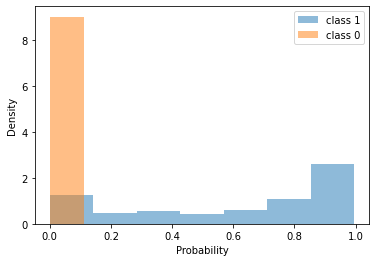

In [62]:
plt.hist(y_pred_proba[y_test == 1], bins=7, density=True, label='class 1', alpha=0.5)
plt.hist(y_pred_proba[y_test == 0], bins=7, density=True, label='class 0', alpha=0.5)

plt.xlabel("Probability")
plt.ylabel("Density")

plt.legend()